In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('../../../Datasets/kaggle/melb_data.csv')

In [5]:
df_train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
round(df_train['Price'].describe(),ndigits=0)

count      13580.0
mean     1075684.0
std       639311.0
min        85000.0
25%       650000.0
50%       903000.0
75%      1330000.0
max      9000000.0
Name: Price, dtype: float64

In [7]:
import seaborn as sns

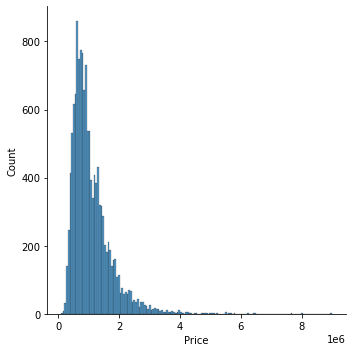

In [8]:
sns.displot(df_train['Price'])

In [9]:
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())


Skewness: 2.239624
Kurtosis: 9.874339


In [10]:
import matplotlib.pyplot as plt


<AxesSubplot:>

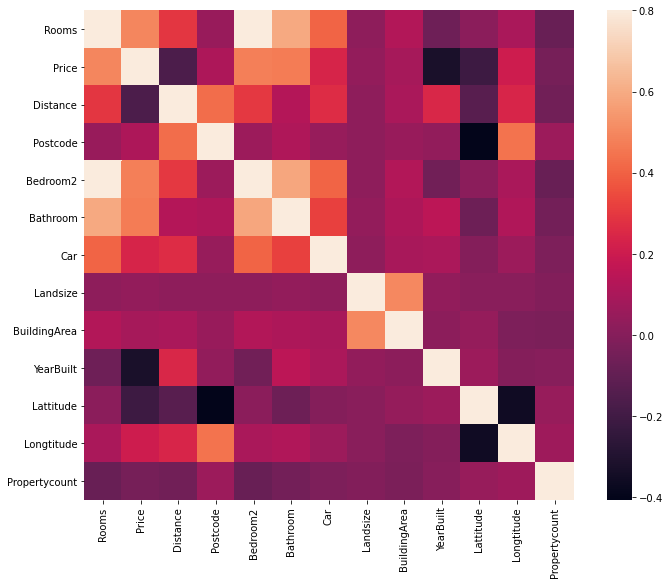

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [12]:
import numpy as np

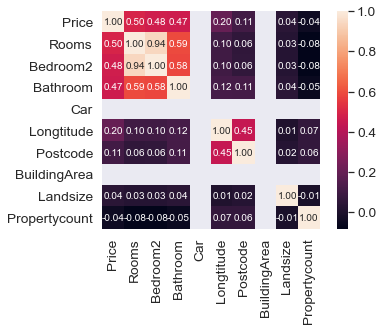

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

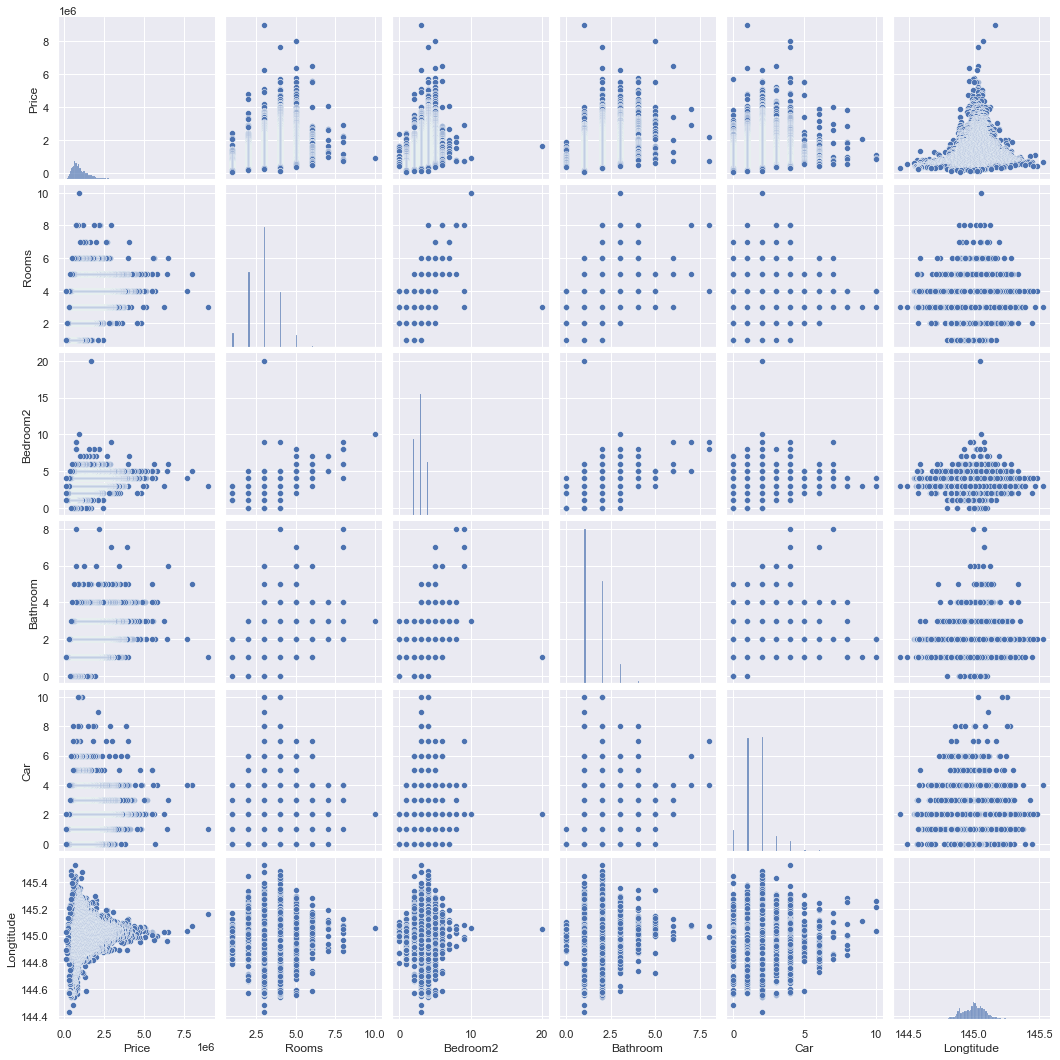

In [14]:
#scatterplot
sns.set()
cols = ['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Longtitude' ]
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [15]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BuildingArea,6450,0.474963
YearBuilt,5375,0.395803
CouncilArea,1369,0.100810
Car,62,0.004566
Suburb,0,0.000000
Bathroom,0,0.000000
Regionname,0,0.000000
Longtitude,0,0.000000
Lattitude,0,0.000000
Landsize,0,0.000000


In [16]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [17]:
df_train.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000


In [18]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Suburb,0,0.0
Postcode,0,0.0
Regionname,0,0.0
Longtitude,0,0.0
Lattitude,0,0.0
Landsize,0,0.0
Bathroom,0,0.0
Bedroom2,0,0.0
Distance,0,0.0
Address,0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['Price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.54966985]
 [-1.47771471]
 [-1.45581532]
 [-1.45581532]
 [-1.43235169]
 [-1.41670927]
 [-1.41670927]
 [-1.39324563]
 [-1.39324563]
 [-1.38542442]]

outer range (high) of the distribution:
[[ 6.95980777]
 [ 7.07712594]
 [ 7.23355016]
 [ 7.38997438]
 [ 8.09388338]
 [ 8.32851971]
 [ 8.48494393]
 [10.28382247]
 [10.83130725]
 [12.39554946]]


<ipython-input-20-762be9261aed>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['Price'][:,np.newaxis]);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


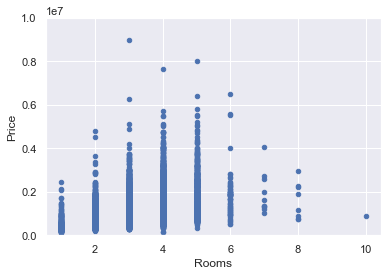

In [21]:
#bivariate analysis saleprice/grlivarea
var = 'Rooms'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,10000000));

In [31]:
#deleting points
# df_train.sort_values(by = 'Price', ascending = False)[:2]
# df_train.iloc[0]
df_train = df_train.drop(df_train[df_train[0].index])
# df_train = df_train.drop(df_train[df_train.iloc[12094]].index)
# df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

KeyError: 0